In [1]:
%pylab inline
import pandas as pd
from scipy.optimize import curve_fit
import os

Populating the interactive namespace from numpy and matplotlib


In [2]:
standardFonts = {'family' : 'Arial',
                 'size' : 14}

subplotLabels = {'fontsize': rcParams['axes.titlesize'],
                 'fontweight' : 'bold',
                 'verticalalignment': 'baseline',
                 'horizontalalignment': 'left'}
    
matplotlib.rc('font', **standardFonts)
mpl.rcParams['mathtext.fontset']  = 'dejavuserif'
mpl.rcParams['font.family']       = 'Arial'
matplotlib.rc('font', **standardFonts)

mpl.rcParams['xtick.major.size']  = 8
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.size']  = 4
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['xtick.direction']   = 'in'
mpl.rcParams['xtick.top']         = True
mpl.rcParams['xtick.bottom']      = True
mpl.rcParams['xtick.labelsize']   = 16
mpl.rcParams['ytick.major.size']  = 8
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.size']  = 4
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['ytick.direction']   = 'in'
mpl.rcParams['ytick.left']        = True
mpl.rcParams['ytick.right']       = True
mpl.rcParams['ytick.labelsize']   = 16

mpl.rcParams['axes.linewidth']    = 2
mpl.rcParams['axes.titlesize']    = 20
mpl.rcParams['axes.titleweight']  = 'bold'
mpl.rcParams['axes.labelweight']  = 'bold'
mpl.rcParams['axes.labelsize']    = 16

In [3]:
def lorentzian_fcn(x, I, x0, gamma):
    return I*((gamma**2)/(((x-x0)**2)+gamma**2))

def two_lorentzian(x, I1, x1, gamma1, I2, x2, gamma2, y0):
    return lorentzian_fcn(x, I1, x1, gamma1) + lorentzian_fcn(x, I2, x2, gamma2) + y0 

In [22]:
def process_data(datafn, bgrfn, int_time, no_bgr = False):
    data = pd.read_csv(datafn, header = 0, index_col = 0, names = ['wn', 'I'])
    if no_bgr:
        data_proc = ((data.I)/(int_time/1000))[1150:]
    else:
        bgr  = pd.read_csv(bgrfn, header = 0, index_col = 0, names = ['wn', 'I'])

        data_proc = ((data.I - bgr.I)/(int_time/1000))[1150:]

    lownval, hiwnval = data_proc[data_proc.index.min():data_proc.index.min() + 50].mean(), data_proc[data_proc.index.max() - 50:data_proc.index.max()].mean()
    lown, hiwn = data_proc[data_proc.index.min():data_proc.index.min() + 50].index.values.mean(), data_proc[data_proc.index.max() - 50:data_proc.index.max()].index.values.mean() 

    m, b = np.polyfit([lown, hiwn], [lownval, hiwnval], 1)

    prms = [150, 1350, 100, 150, 1620, 80, 10]

    data_proc = pd.DataFrame(data_proc - (data_proc.index * m + b))

    popt, pcov = curve_fit(two_lorentzian, data_proc.index.values, data_proc.I.values, p0 = prms)

    data_proc['fit'] = two_lorentzian(data_proc.index, *popt)

    return data_proc.copy(), popt

In [11]:
datafn = 'data/2018-09-06/2018-09-06 15_36_29 GO_sample15_spot1_500ms_N10.csv'
bgrfn = 'data/2018-09-06/2018-09-06 15_11_15 GO_sample15_spot1_500ms_N10_bgr.csv'

In [29]:
data, params = process_data(datafn, 0, 500, True)

In [27]:
params

array([  155.46286993,  1377.11897853,    60.59881209,   164.50318477,
        1610.21884664,    39.78540419,   -18.73666347])

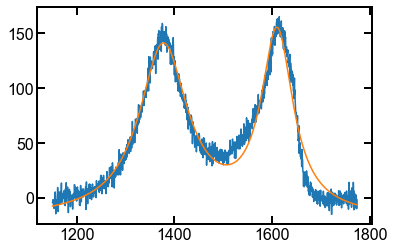

In [28]:
plot(data.I)
plot(data.fit)